In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


`absent` = Kyphosis nach der OP nicht mehr vorhanden.  
`present` = Kyphosis nach der OP noch vorhanden.  
`Age` = Alter in Monate (Kinder)  
`Number` = Anzahl der Wirbeln die operiert wurden.  
`Start` = Stelle der Wirbelsäule, wo operiert wurde.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## Explorative Daten Analyse

Wir schauen uns ein einfaches Pairplot für diesen kleinen Datensatz an.

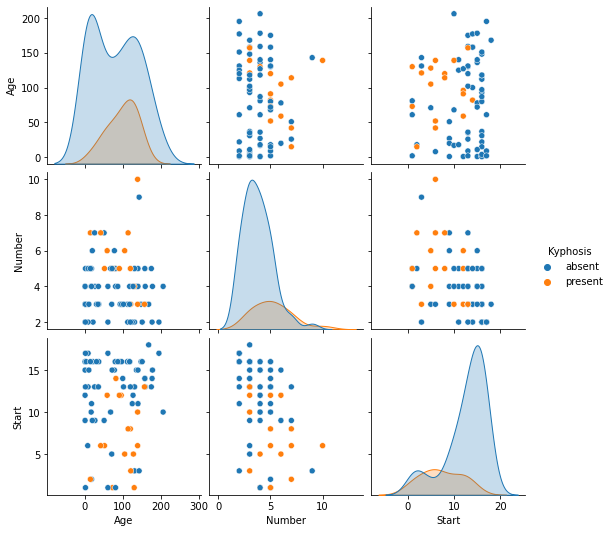

In [5]:
sns.pairplot(df, hue="Kyphosis")

# Train Test Split

Fahren wir damit fort unsere Daten in Trainings- und Testset aufzuteilen:

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis'] # Label

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees (Entscheidungsbäume)

Wir beginnen damit einen einzelnen Entscheidungsbaum zu trainieren:

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.76      0.81      0.79        16
     present       0.62      0.56      0.59         9

    accuracy                           0.72        25
   macro avg       0.69      0.68      0.69        25
weighted avg       0.71      0.72      0.72        25



[[13  3]
 [ 4  5]]


## Entscheidungsbaum Visualisierung

In [15]:
from IPython.display import Image
from six import StringIO

In [16]:
from sklearn.tree import export_graphviz
import pydot

In [17]:
features = list(df.columns[1:])  # eins bis Ende (ohne Kyphosis)

In [18]:
features

['Age', 'Number', 'Start']

In [19]:
dot_data = StringIO()

In [20]:
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

In [21]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

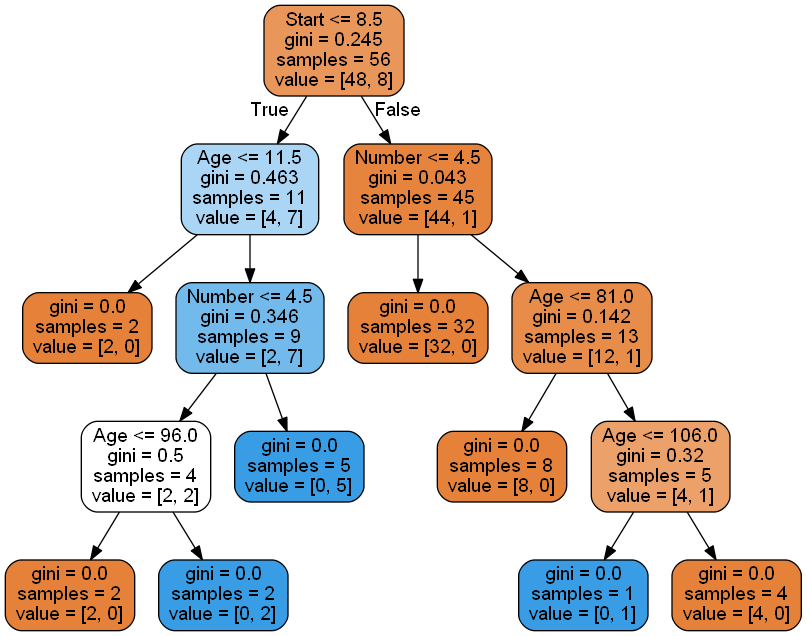

In [22]:
Image(graph[0].create_png()) # graph[0] = root

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) # n_estimators = Anzahl der Bäume

In [24]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = rfc.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.74      0.88      0.80        16
     present       0.67      0.44      0.53         9

    accuracy                           0.72        25
   macro avg       0.70      0.66      0.67        25
weighted avg       0.71      0.72      0.70        25



[[14  2]
 [ 5  4]]
